## Dataset Embedding Experiments with base model
Baseline：SBERT

In [1]:
import pandas as pd

In [2]:
from sentence_transformers import SentenceTransformer, CrossEncoder

bi_encoder = SentenceTransformer('all-mpnet-base-v2')  

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-12-v2')



In [3]:
jd_df = pd.read_excel("../1_data_cleaning/filtered_jd_sections2.xlsx")


In [4]:
jd_df.head()

,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Project Manager,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED


In [5]:
# create semantic sentence for each row
def jd_build_semantic_sentence(row):
    desc = str(row.get("job_description", ""))
    duties = str(row.get("jd_duties", ""))
    req = str(row.get("jd_requirements", ""))
    edu = str(row.get("jd_education", ""))
    title = str(row.get("job_title", ""))

    return (
        f"Job Posting:\n"
        f"- Job Title: {title}\n"
        f"- Description: {desc}\n"
        f"- Responsibilities: {duties}\n"
        f"- Requirements: {req}\n"
        f"- Preferred Education: {edu}"
    )



jd_df["semantic_sentence"] = jd_df.apply(jd_build_semantic_sentence, axis=1)
jd_df.head()



,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education,semantic_sentence
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...,Job Posting:\n- Job Title: Content Developer f...
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree,Job Posting:\n- Job Title: Land Assistant\n- D...
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Project Manager,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...,Job Posting:\n- Job Title: Project Manager\n- ...
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B,Job Posting:\n- Job Title: Asphalt Quality Con...
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED,Job Posting:\n- Job Title: Customer Support Sp...


In [6]:
resume_df = pd.read_csv("../1_data_cleaning/resume_cleaned_100.csv")

In [7]:
resume_df.head(10)

,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...
5,"Fresher starting out with Business Analysis, a...","['Business Analyst', 'Data Analysis', 'Busines...",['BBA'],['N/A'],['Part-Time Analyst'],"Full Stack Development\nFront-end: ReactJS, Ne..."
6,Data Scientist working on problems related to ...,"['Java', 'C++', 'Python', 'Machine Learning', ...","['B.Tech', 'M.Tech']","['Computer Science', 'Computer Science Enginee...",['Data Scientist'],Machine Learning Design\nData Analysis\nModel ...
7,Financial Accountant specializing in financial...,"['account reconciliations', 'accounting', 'acc...","['MBA', 'B.Com', 'Diploma']","['Finance and IT', 'Mgt Hons', 'Computer Appli...","['Accountant', 'Consultant', 'N/A']",Machinery Maintenance\nTroubleshooting\nReport...
8,I am fresher data analyst starting out in ERP ...,"['MIS reporting', 'Advanced Excel', 'Dashboard...","['B.A (Economics)', 'M.A (Economics), Correspo...","['Economics', 'Economics']",['MIS Analyst'],Management Trainee\nMechanical Systems\nMainte...
9,Certified Data analyst with a degree in Electr...,"['Python', 'Machine Learning', 'MySQL', 'Data ...",['B.Tech/B.E.'],['Electronics/Telecommunication'],['Associate Analyst'],Project Design\nData Analysis\nACCORD/Alliance...


In [8]:
# create semantic sentences for resumes
def resume_build_semantic_sentence(row):
    def clean(value):
        if value is None:
            return ""
        if isinstance(value, list):
            return ", ".join([str(v) for v in value])
        return str(value).strip()

    career = clean(row.get("career_objective", ""))
    skills = clean(row.get("skills", ""))
    degrees = clean(row.get("degree_names", ""))
    majors = clean(row.get("major_field_of_studies", ""))
    work_exp = clean(row.get("Work Experience", ""))

    return (
        "Candidate Profile:\n"
        f"- Career Objective: {career}\n"
        f"- Work Experience: {work_exp}\n"
        f"- Skills: {skills}\n"
        f"- Degrees: {degrees}\n"
        f"- Major Field(s) of Study: {majors}"
    )



In [9]:
# create semantic sentences for resumes
resume_df["semantic_sentence"] = resume_df.apply(resume_build_semantic_sentence, axis=1)
resume_df.head()


,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities,semantic_sentence
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...,Candidate Profile:\n- Career Objective: Experi...
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...,Candidate Profile:\n- Career Objective: I am a...
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...,Candidate Profile:\n- Career Objective: I desi...
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...,Candidate Profile:\n- Career Objective: As a D...
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...,Candidate Profile:\n- Career Objective: Financ...


In [10]:
def embed_sentence(sentence):
    return bi_encoder.encode(sentence)


In [11]:
# embed JD semantic sentences
jd_df["semantic_emb"] = jd_df["semantic_sentence"].apply(embed_sentence)
jd_df.head()

,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education,semantic_sentence,semantic_emb
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...,Job Posting:\n- Job Title: Content Developer f...,"[-0.010107441, -0.023181697, -0.041947138, -0...."
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree,Job Posting:\n- Job Title: Land Assistant\n- D...,"[0.040389102, 0.07183061, -0.0014597354, -0.04..."
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Project Manager,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...,Job Posting:\n- Job Title: Project Manager\n- ...,"[0.036204915, 0.08343988, -0.005588149, 0.0499..."
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B,Job Posting:\n- Job Title: Asphalt Quality Con...,"[-0.015358253, 0.04020662, -0.009223265, 0.023..."
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED,Job Posting:\n- Job Title: Customer Support Sp...,"[0.018529275, -0.050914153, -0.04652271, -0.04..."


In [12]:
# embed resume semantic sentences
resume_df["semantic_emb"] = resume_df["semantic_sentence"].apply(embed_sentence)
resume_df.head()

,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities,semantic_sentence,semantic_emb
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...,Candidate Profile:\n- Career Objective: Experi...,"[0.02187014, -0.00567093, -0.029908553, -0.055..."
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...,Candidate Profile:\n- Career Objective: I am a...,"[0.030558903, 0.04185108, -0.025667462, -0.063..."
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...,Candidate Profile:\n- Career Objective: I desi...,"[0.028744925, 0.021873016, -0.010584048, -0.06..."
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...,Candidate Profile:\n- Career Objective: As a D...,"[0.024126707, 0.05297582, -0.044053417, -0.050..."
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...,Candidate Profile:\n- Career Objective: Financ...,"[0.016279072, 0.055851545, -0.017432084, -0.05..."


In [13]:
import pandas as pd

In [14]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  




In [15]:
jd_df = pd.read_excel("../1_data_cleaning/filtered_jd_sections2.xlsx")


In [16]:
jd_df.head()

,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Project Manager,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED


In [17]:
# create semantic sentence for each row
def jd_build_semantic_sentence(row):
    desc = str(row.get("job_description", ""))
    duties = str(row.get("jd_duties", ""))
    req = str(row.get("jd_requirements", ""))
    edu = str(row.get("jd_education", ""))
    title = str(row.get("job_title", ""))

    return (
        f"Job Posting:\n"
        f"- Job Title: {title}\n"
        f"- Description: {desc}\n"
        f"- Responsibilities: {duties}\n"
        f"- Requirements: {req}\n"
        f"- Preferred Education: {edu}"
    )



jd_df["semantic_sentence"] = jd_df.apply(jd_build_semantic_sentence, axis=1)
jd_df.head()



,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education,semantic_sentence
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...,Job Posting:\n- Job Title: Content Developer f...
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree,Job Posting:\n- Job Title: Land Assistant\n- D...
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Project Manager,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...,Job Posting:\n- Job Title: Project Manager\n- ...
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B,Job Posting:\n- Job Title: Asphalt Quality Con...
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED,Job Posting:\n- Job Title: Customer Support Sp...


In [18]:
resume_df = pd.read_csv("../1_data_cleaning/resume_cleaned_100.csv")

In [19]:
resume_df.head(10)

,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...
5,"Fresher starting out with Business Analysis, a...","['Business Analyst', 'Data Analysis', 'Busines...",['BBA'],['N/A'],['Part-Time Analyst'],"Full Stack Development\nFront-end: ReactJS, Ne..."
6,Data Scientist working on problems related to ...,"['Java', 'C++', 'Python', 'Machine Learning', ...","['B.Tech', 'M.Tech']","['Computer Science', 'Computer Science Enginee...",['Data Scientist'],Machine Learning Design\nData Analysis\nModel ...
7,Financial Accountant specializing in financial...,"['account reconciliations', 'accounting', 'acc...","['MBA', 'B.Com', 'Diploma']","['Finance and IT', 'Mgt Hons', 'Computer Appli...","['Accountant', 'Consultant', 'N/A']",Machinery Maintenance\nTroubleshooting\nReport...
8,I am fresher data analyst starting out in ERP ...,"['MIS reporting', 'Advanced Excel', 'Dashboard...","['B.A (Economics)', 'M.A (Economics), Correspo...","['Economics', 'Economics']",['MIS Analyst'],Management Trainee\nMechanical Systems\nMainte...
9,Certified Data analyst with a degree in Electr...,"['Python', 'Machine Learning', 'MySQL', 'Data ...",['B.Tech/B.E.'],['Electronics/Telecommunication'],['Associate Analyst'],Project Design\nData Analysis\nACCORD/Alliance...


In [20]:
# create semantic sentences for resumes
def resume_build_semantic_sentence(row):
    def clean(value):
        if value is None:
            return ""
        if isinstance(value, list):
            return ", ".join([str(v) for v in value])
        return str(value).strip()

    career = clean(row.get("career_objective", ""))
    skills = clean(row.get("skills", ""))
    degrees = clean(row.get("degree_names", ""))
    majors = clean(row.get("major_field_of_studies", ""))
    work_exp = clean(row.get("Work Experience", ""))

    return (
        "Candidate Profile:\n"
        f"- Career Objective: {career}\n"
        f"- Work Experience: {work_exp}\n"
        f"- Skills: {skills}\n"
        f"- Degrees: {degrees}\n"
        f"- Major Field(s) of Study: {majors}"
    )


In [21]:
# create semantic sentences for resumes
resume_df["semantic_sentence"] = resume_df.apply(resume_build_semantic_sentence, axis=1)
resume_df.head()


,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities,semantic_sentence
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...,Candidate Profile:\n- Career Objective: Experi...
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...,Candidate Profile:\n- Career Objective: I am a...
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...,Candidate Profile:\n- Career Objective: I desi...
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...,Candidate Profile:\n- Career Objective: As a D...
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...,Candidate Profile:\n- Career Objective: Financ...


In [22]:
def embed_sentence(sentence):
    return model.encode(sentence)


In [23]:
# embed JD semantic sentences
jd_df["semantic_emb"] = jd_df["semantic_sentence"].apply(embed_sentence)
jd_df.head()

,job_description,location_cleaned,job_title,jd_duties,jd_requirements,jd_education,semantic_sentence,semantic_emb
0,Job SummaryDo you have a strong aptitude for w...,"Natick, MA",Content Developer for MATLAB Code Generation,Software components make up an ever larger par...,Job SummaryDo you have a strong aptitude for w...,Minimum Qualifications A bachelor's degree and...,Job Posting:\n- Job Title: Content Developer f...,"[-0.10671433, 0.0056791175, -0.0624547, -0.033..."
1,Overview External: Chevron is one of the world...,"Houston, TX",Land Assistant,Overview External: Chevron is one of the world...,"Prepare, and secure appropriate approvals for ...",Preferred Qualifications: Bachelor's degree,Job Posting:\n- Job Title: Land Assistant\n- D...,"[-0.017846622, 0.0006553762, 0.021964636, 0.03..."
2,Overview: The Hartman Non-Profit is seeking to...,"Houston, TX",Project Manager,Overview: The Hartman Non-Profit is seeking to...,Required Abilities and Experience: · A strong ...,· A minimum of a Bachelor’s degree in a busine...,Job Posting:\n- Job Title: Project Manager\n- ...,"[0.00039842835, -0.010090515, -0.06636824, 0.0..."
3,City: Houston State:Texas Postal/Zip Code: 770...,"Houston, TX",Asphalt Quality Control Manager -Houston,Our operations span the nation from Montana to...,Other Requirements Display a professional and ...,Qualifications Bachelor’s degree (B,Job Posting:\n- Job Title: Asphalt Quality Con...,"[-0.0521305, -0.0077233715, 0.119051345, 0.006..."
4,Hiring! Immediate openings for Customer Suppor...,"San Antonio, TX",Customer Support Specialist!,Immediate openings for Customer Support Specia...,Hiring\nWe want your excellent customer servic...,High School Diploma/GED,Job Posting:\n- Job Title: Customer Support Sp...,"[-0.12016528, -0.025718965, 0.08040904, 0.0225..."


In [24]:
# embed resume semantic sentences
resume_df["semantic_emb"] = resume_df["semantic_sentence"].apply(embed_sentence)
resume_df.head()

,career_objective,skills,degree_names,major_field_of_studies,positions,responsibilities,semantic_sentence,semantic_emb
0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],"['Engineering Manager', 'Project Engineer II',...",Management Trainee\nMechanical Systems\nMainte...,Candidate Profile:\n- Career Objective: Experi...,"[-0.007607171, -0.0857896, 0.0109465085, 0.030..."
1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],['SDE'],Recruitment Coordination\nAppointment Manageme...,Candidate Profile:\n- Career Objective: I am a...,"[0.0004082126, -0.02286207, 0.03676343, -0.002..."
2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],"['ENGINEERING COORDINATOR', 'FACILITIES TEMP',...",Machine Learning Design\nData Analysis\nModel ...,Candidate Profile:\n- Career Objective: I desi...,"[-0.0070703235, -0.03104064, -0.014893291, 0.0..."
3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",['Data Analyst'],Mikrotik Router Configuration\nOLT Device Setu...,Candidate Profile:\n- Career Objective: As a D...,"[0.001028, 0.0050214287, -0.033533473, 0.05339..."
4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],"['Senior Accountant', 'Senior Accountant/Finan...",Design Creation\nCAD Drawings\nDesign Optimiza...,Candidate Profile:\n- Career Objective: Financ...,"[-0.017242322, 0.01117676, -0.07966673, 0.0394..."


In [25]:
def match_resumes_to_topk_jds(
        jd_df,
        resume_df,
        jd_emb_col="semantic_emb",
        resume_emb_col="semantic_emb",
        jd_text_cols=["job_title", "location_cleaned"],
        resume_cols=["career_objective", "skills", "degree_names",
                     "major_field_of_studies", "Work Experience"],
        top_k=3):

    import numpy as np
    import pandas as pd
    from sklearn.metrics.pairwise import cosine_similarity

    # -----------------------------
    # Embedding cleaner
    # -----------------------------
    def to_vector(x, idx, name):
        """
        Convert embedding to valid 1D numpy array.
        Supports:
        - list
        - numpy.ndarray
        - torch.tensor
        """
        if x is None:
            raise ValueError(f"Embedding at index {idx} in column '{name}' is None.")

        # torch tensor
        if 'torch' in str(type(x)):
            x = x.detach().cpu().numpy()

        # convert list → numpy array
        if isinstance(x, list):
            x = np.array(x)

        if isinstance(x, np.ndarray):
            if x.ndim == 1:
                return x
            elif x.ndim == 2 and x.shape[0] == 1:
                return x[0]         # flatten 1-row matrices
            else:
                return x.flatten()  # catch-all: flatten
        else:
            raise ValueError(
                f"Embedding at index {idx} in '{name}' is invalid: type={type(x)}, value={x}"
            )

    # -----------------------------
    # Convert embeddings
    # -----------------------------
    jd_matrix = np.vstack([to_vector(emb, i, jd_emb_col) for i, emb in enumerate(jd_df[jd_emb_col])])
    resume_matrix = np.vstack([to_vector(emb, i, resume_emb_col) for i, emb in enumerate(resume_df[resume_emb_col])])

    rows = []

    # -----------------------------
    # Loop over resumes
    # -----------------------------
    for i in range(len(resume_df)):

        r_vec = resume_matrix[i].reshape(1, -1)
        sims = cosine_similarity(r_vec, jd_matrix)[0]

        top_idx = sims.argsort()[::-1][:top_k]

        row = {
            "resume_index": i
        }

        # Resume fields
        for col in resume_cols:
            row[f"resume_{col}"] = resume_df.iloc[i][col] if col in resume_df.columns else None

        # JD matches
        for rank, jd_i in enumerate(top_idx, 1):
            row[f"top{rank}_jd_index"] = int(jd_i)
            row[f"top{rank}_similarity"] = float(sims[jd_i])

            for col in jd_text_cols:
                row[f"top{rank}_{col}"] = jd_df.iloc[jd_i][col] if col in jd_df.columns else None

        rows.append(row)

    return pd.DataFrame(rows)



In [26]:
output_baseline_df = match_resumes_to_topk_jds(
    jd_df=jd_df,
    resume_df=resume_df,
    jd_emb_col="semantic_emb",
    resume_emb_col="semantic_emb",
    jd_text_cols=["job_title", "location_cleaned"],
    resume_cols=[
        "career_objective",
        "skills",
        "degree_names",
        "major_field_of_studies",
        "responsibilities"
    ],
    top_k=3
)



In [27]:
output_baseline_df

,resume_index,resume_career_objective,resume_skills,resume_degree_names,resume_major_field_of_studies,resume_responsibilities,top1_jd_index,top1_similarity,top1_job_title,top1_location_cleaned,top2_jd_index,top2_similarity,top2_job_title,top2_location_cleaned,top3_jd_index,top3_similarity,top3_job_title,top3_location_cleaned
0,0,Experienced product development Engineer and m...,"['Microsoft Office', 'Microsoft Project', 'Pro...",['Bachelor of Science'],['Mechanical Engineering'],Management Trainee\nMechanical Systems\nMainte...,1159,0.615403,Sr. Project Engineer,"State College, PA",970,0.601701,Design Responsible Engineer - Body-in-White Job,"Auburn Hills, MI",213,0.594786,Product Manager,"Durham, NC"
1,1,"I am a software engineer, and I want to work o...","['C++', 'Python', 'Firebase', 'Flutter', 'Tens...",['B.Tech'],['Computers'],Recruitment Coordination\nAppointment Manageme...,228,0.644445,Software Engineer and Analyst,"Santa Barbara, CA",45,0.584580,Sr. .Net Developer,"Dallas, TX",374,0.584080,Resident Nurse,"Columbia, MD"
2,2,I desire to work for a company that provides c...,"['Word', 'SAP Time Approval', 'Excel', 'Travel...",['Associate of Arts'],['Administrative Assistance'],Machine Learning Design\nData Analysis\nModel ...,228,0.639833,Software Engineer and Analyst,"Santa Barbara, CA",213,0.626926,Product Manager,"Durham, NC",267,0.587929,Level Help Desk,"Seattle, WA"
3,3,As a Data Analyst I always look into more inno...,"['Machine Learning', 'Artificial Intelligence'...","['B.Tech', 'M.Tech']","[None, None]",Mikrotik Router Configuration\nOLT Device Setu...,68,0.591576,Data Architect,"Cary, NC",228,0.567510,Software Engineer and Analyst,"Santa Barbara, CA",213,0.557104,Product Manager,"Durham, NC"
4,4,Financial and Accounting professional with exp...,['Power User of Microsoft Excel Epicor NetSuit...,['Bachelor of Business Administration'],['Accounting'],Design Creation\nCAD Drawings\nDesign Optimiza...,50,0.652563,Business Analyst,"Dallas, TX",1018,0.617382,Staff Accountant,"Dallas, TX",958,0.615563,Associate,"Mclean, VA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Seeking challenging opportunity in the field o...,"['Python', 'MySQL', 'Tensorflow', 'Keras', 'Ma...",['B.Tech'],['Metallurgy'],Supervision\nMonitoring\nConstruction\nEstimat...,228,0.591405,Software Engineer and Analyst,"Santa Barbara, CA",68,0.583707,Data Architect,"Cary, NC",45,0.553826,Sr. .Net Developer,"Dallas, TX"
96,96,Extremely motivated to constantly develop my s...,"['Python', 'Machine Learning', 'Deep Learning'...",['B.TECH'],['N/A'],Machinery Maintenance\nTroubleshooting\nReport...,228,0.681240,Software Engineer and Analyst,"Santa Barbara, CA",885,0.594464,Systems Engineer,"Boston, MA",960,0.576962,Software Engineer,"Tulsa, OK"
97,97,Deep Learning fresher who is looking to join a...,"['Applied Machine Learning', 'Deep Learning', ...",['B.Tech'],['Computer Science & Engineering'],Machine Learning Leadership\nCross-Functional ...,228,0.580927,Software Engineer and Analyst,"Santa Barbara, CA",45,0.579625,Sr. .Net Developer,"Dallas, TX",156,0.574414,Project Manager,"Sunnyvale, CA"
98,98,Experienced Senior Corporate Accountant dedica...,"['Microsoft Excel expert - Pivot Tables, V-Loo...","['MBA', 'BBA - Accounting', 'BBA - Finance']","['Business Administration, Accounting & Financ...",Data Platform Design\nData Pipeline Developmen...,1018,0.620158,Staff Accountant,"Dallas, TX",168,0.610184,Manager,"Waltham, MA",1209,0.599344,Lead Accountant,"Cincinnati, OH"


In [28]:
output_baseline_df.columns

Index(['resume_index', 'resume_career_objective', 'resume_skills',
       'resume_degree_names', 'resume_major_field_of_studies',
       'resume_responsibilities', 'top1_jd_index', 'top1_similarity',
       'top1_job_title', 'top1_location_cleaned', 'top2_jd_index',
       'top2_similarity', 'top2_job_title', 'top2_location_cleaned',
       'top3_jd_index', 'top3_similarity', 'top3_job_title',
       'top3_location_cleaned'],
      dtype='object')

In [29]:
output_baseline_df.to_csv("../4_model_outputs/baseline_outputs.csv", index=False)

In [30]:
# create a visualization of the similarity scores
import matplotlib.pyplot as plt
import seaborn as sns

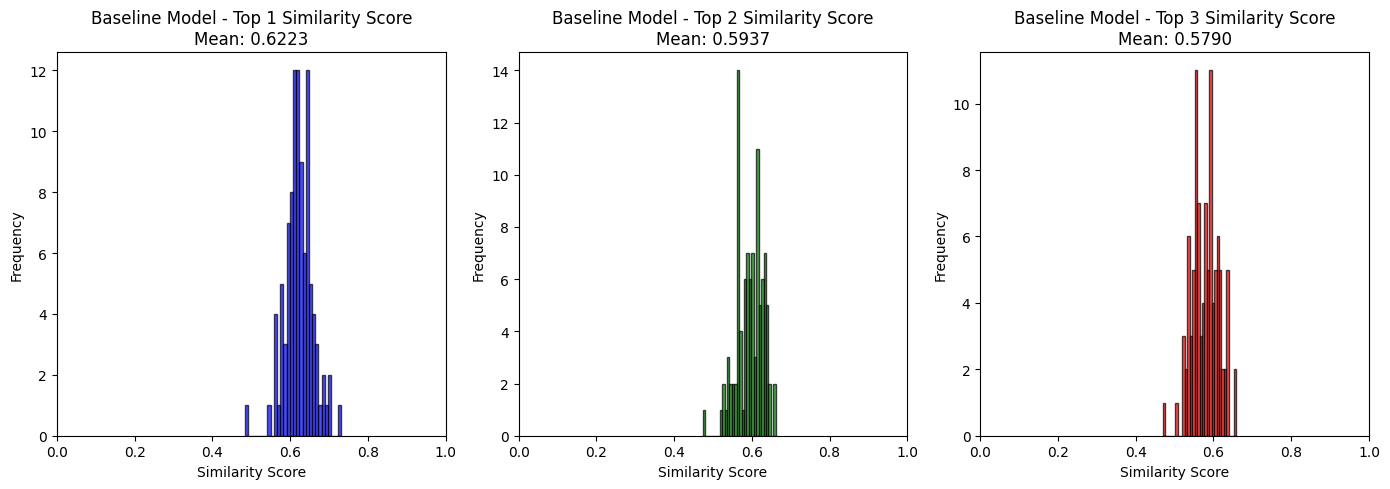

In [31]:
# visulalize the similarity scores of baseline model
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
for ax in axes:
    ax.set_xlim(0, 1)


# Top 1
baseline_top1_sims = output_baseline_df['top1_similarity']
axes[0].hist(baseline_top1_sims, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title(f'Baseline Model - Top 1 Similarity Score\nMean: {baseline_top1_sims.mean():.4f}')
axes[0].set_xlabel('Similarity Score')
axes[0].set_ylabel('Frequency')

# Top 2
baseline_top2_sims = output_baseline_df['top2_similarity']
axes[1].hist(baseline_top2_sims, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title(f'Baseline Model - Top 2 Similarity Score\nMean: {baseline_top2_sims.mean():.4f}')
axes[1].set_xlabel('Similarity Score')
axes[1].set_ylabel('Frequency')

# Top 3
baseline_top3_sims = output_baseline_df['top3_similarity']
axes[2].hist(baseline_top3_sims, bins=30, alpha=0.7, color='red', edgecolor='black')
axes[2].set_title(f'Baseline Model - Top 3 Similarity Score\nMean: {baseline_top3_sims.mean():.4f}')
axes[2].set_xlabel('Similarity Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
